In [ ]:
!pip install -U scikit-learn scipy matplotlib

^C


In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the data using pandas into mp {Monkey Pox}
mp = pd.read_csv('DATA.csv', index_col= 0)
mp.head()

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
Patient_ID,,,,,,,,,,
P0,None,False,True,True,True,False,True,False,False,Negative
P1,Fever,True,False,True,True,False,False,True,False,Positive
P2,Fever,False,True,True,False,False,False,True,False,Positive
P3,None,True,False,False,False,True,True,True,False,Positive
P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [4]:
mp.groupby('MonkeyPox').sum()['HIV Infection']

MonkeyPox
Negative    3697
Positive    8887
Name: HIV Infection, dtype: int64

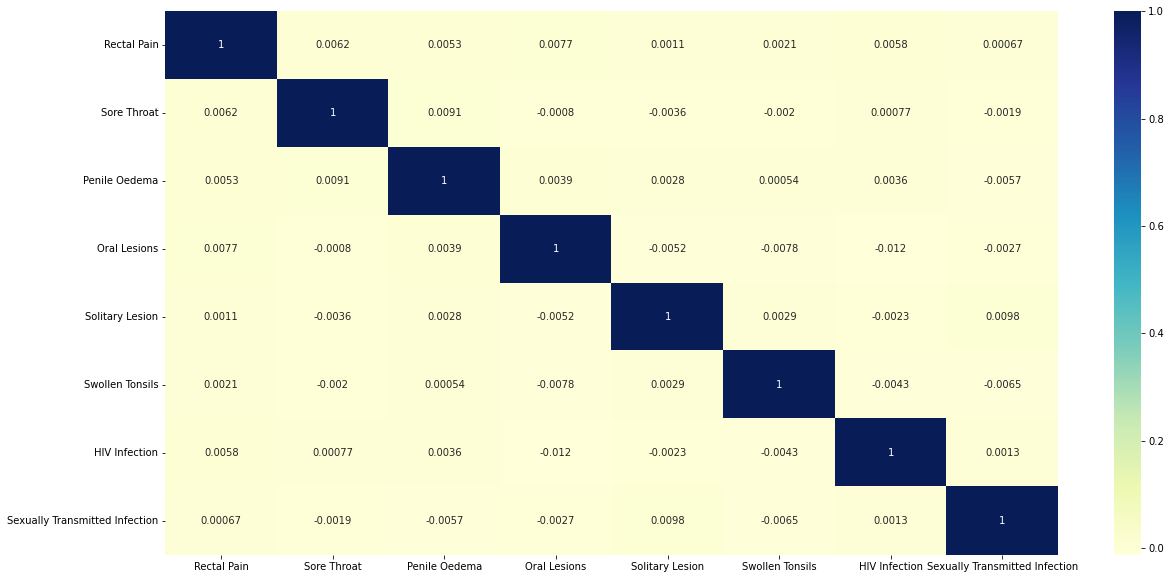

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
corr = mp.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

In [6]:
# Checking the summary of the data

mp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, P0 to P24999
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Systemic Illness                25000 non-null  object
 1   Rectal Pain                     25000 non-null  bool  
 2   Sore Throat                     25000 non-null  bool  
 3   Penile Oedema                   25000 non-null  bool  
 4   Oral Lesions                    25000 non-null  bool  
 5   Solitary Lesion                 25000 non-null  bool  
 6   Swollen Tonsils                 25000 non-null  bool  
 7   HIV Infection                   25000 non-null  bool  
 8   Sexually Transmitted Infection  25000 non-null  bool  
 9   MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(2)
memory usage: 781.2+ KB


In [7]:
mp.index.duplicated().sum()

0

In [8]:
# Making a list of all the bool columns to use in get_dummies
col = list(mp.columns)

col.remove('Systemic Illness')
col

['Rectal Pain',
 'Sore Throat',
 'Penile Oedema',
 'Oral Lesions',
 'Solitary Lesion',
 'Swollen Tonsils',
 'HIV Infection',
 'Sexually Transmitted Infection',
 'MonkeyPox']

In [9]:
col

['Rectal Pain',
 'Sore Throat',
 'Penile Oedema',
 'Oral Lesions',
 'Solitary Lesion',
 'Swollen Tonsils',
 'HIV Infection',
 'Sexually Transmitted Infection',
 'MonkeyPox']

In [10]:
mp.describe()

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
count,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,4,2,2,2,2,2,2,2,2,2
top,Fever,False,True,True,False,True,True,True,False,Positive
freq,6382,12655,12554,12612,12514,12527,12533,12584,12554,15909


In [11]:
# Checking on the uniue value counts in Systemic Illness
mp['Systemic Illness'].value_counts()

Fever                    6382
Swollen Lymph Nodes      6252
None                     6216
Muscle Aches and Pain    6150
Name: Systemic Illness, dtype: int64

In [12]:
# Reducing ambiguity in the systemic illness column we change none to No systemic Illness

mp['Systemic Illness'].replace(to_replace= 'None',value= 'No Systemic Illness',inplace= True)

In [13]:
# Confirming change
mp['Systemic Illness'].value_counts()

Fever                    6382
Swollen Lymph Nodes      6252
No Systemic Illness      6216
Muscle Aches and Pain    6150
Name: Systemic Illness, dtype: int64

From the above info we can see that all the columns have only two unique values meaning converting to int will not be as complicated.

Systemic illness has the most with 4.

data cleaning will be relatievly easy as the data has no missing values and no duplicates.

Only task is type casting.


In [14]:
# type casting Systemic illness by using get dummies
df = pd.get_dummies(data= mp, columns= ['Systemic Illness'],drop_first= False)
# dropping every other column to isolate the systemic illness ...will concat later.
df_Systemic = df.drop(columns= col,axis = 1)
df_Systemic

,Systemic Illness_Fever,Systemic Illness_Muscle Aches and Pain,Systemic Illness_No Systemic Illness,Systemic Illness_Swollen Lymph Nodes
Patient_ID,,,,
P0,0,0,1,0
P1,1,0,0,0
P2,1,0,0,0
P3,0,0,1,0
P4,0,0,0,1
...,...,...,...,...
P24995,0,0,1,0
P24996,1,0,0,0
P24997,0,0,1,0


In [15]:
df_d = pd.get_dummies(data = mp, columns= col, drop_first= True)
df_d

,Systemic Illness,Rectal Pain_True,Sore Throat_True,Penile Oedema_True,Oral Lesions_True,Solitary Lesion_True,Swollen Tonsils_True,HIV Infection_True,Sexually Transmitted Infection_True,MonkeyPox_Positive
Patient_ID,,,,,,,,,,
P0,No Systemic Illness,0,1,1,1,0,1,0,0,0
P1,Fever,1,0,1,1,0,0,1,0,1
P2,Fever,0,1,1,0,0,0,1,0,1
P3,No Systemic Illness,1,0,0,0,1,1,1,0,1
P4,Swollen Lymph Nodes,1,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
P24995,No Systemic Illness,1,1,0,1,1,0,0,1,1
P24996,Fever,0,1,1,0,1,1,1,1,1
P24997,No Systemic Illness,1,1,0,0,1,1,0,0,1


In [16]:
# Dropping Systemic illness as its already dummied out

df_d.drop(axis = 1, columns= ['Systemic Illness'] ,inplace = True)


In [17]:
# Column names will have to be changed but that can be done in one go
# first we finish up on converting the column data types t a usable state.
df_d.head()

,Rectal Pain_True,Sore Throat_True,Penile Oedema_True,Oral Lesions_True,Solitary Lesion_True,Swollen Tonsils_True,HIV Infection_True,Sexually Transmitted Infection_True,MonkeyPox_Positive
Patient_ID,,,,,,,,,
P0,0,1,1,1,0,1,0,0,0
P1,1,0,1,1,0,0,1,0,1
P2,0,1,1,0,0,0,1,0,1
P3,1,0,0,0,1,1,1,0,1
P4,1,1,1,0,0,1,1,0,1


In [18]:
mp.index

Index(['P0', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       ...
       'P24990', 'P24991', 'P24992', 'P24993', 'P24994', 'P24995', 'P24996',
       'P24997', 'P24998', 'P24999'],
      dtype='object', name='Patient_ID', length=25000)

In [19]:
df_clean = pd.concat([df_Systemic,df_d], axis = 1,join= 'inner')
df_clean

,Systemic Illness_Fever,Systemic Illness_Muscle Aches and Pain,Systemic Illness_No Systemic Illness,Systemic Illness_Swollen Lymph Nodes,Rectal Pain_True,Sore Throat_True,Penile Oedema_True,Oral Lesions_True,Solitary Lesion_True,Swollen Tonsils_True,HIV Infection_True,Sexually Transmitted Infection_True,MonkeyPox_Positive
Patient_ID,,,,,,,,,,,,,
P0,0,0,1,0,0,1,1,1,0,1,0,0,0
P1,1,0,0,0,1,0,1,1,0,0,1,0,1
P2,1,0,0,0,0,1,1,0,0,0,1,0,1
P3,0,0,1,0,1,0,0,0,1,1,1,0,1
P4,0,0,0,1,1,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
P24995,0,0,1,0,1,1,0,1,1,0,0,1,1
P24996,1,0,0,0,0,1,1,0,1,1,1,1,1
P24997,0,0,1,0,1,1,0,0,1,1,0,0,1


In [20]:
list(df_clean.columns)

['Systemic Illness_Fever',
 'Systemic Illness_Muscle Aches and Pain',
 'Systemic Illness_No Systemic Illness',
 'Systemic Illness_Swollen Lymph Nodes',
 'Rectal Pain_True',
 'Sore Throat_True',
 'Penile Oedema_True',
 'Oral Lesions_True',
 'Solitary Lesion_True',
 'Swollen Tonsils_True',
 'HIV Infection_True',
 'Sexually Transmitted Infection_True',
 'MonkeyPox_Positive']

In [21]:
df_clean.rename(columns={'Systemic Illness_Fever':'SI_Fever',
                        'Systemic Illness_Muscle Aches and Pain':'SI_Muscle_Aches&Pain',
                        'Systemic Illness_No Systemic Illness':'SI_No_Systemic_Illness',
                        'Systemic Illness_Swollen Lymph Nodes':'SI_Swollen_Lymph_Nodes',
                        'Rectal Pain_True':'Rectal_Pain',
                        'Sore Throat_True':'Sore_Throat',
                        'Penile Oedema_True':'Penile_Oedema',
                        'Oral Lesions_True':'Oral_Lesions',
                        'Solitary Lesion_True':'Solitary_Leision',
                        'Swollen Tonsils_True':'Swollen_Tonsils',
                        'HIV Infection_True':'HIV_Infection',
                        'Sexually Transmitted Infection_True':'STI',
                        'MonkeyPox_Positive':'Target'},inplace=True)
df_clean.head(10)

,SI_Fever,SI_Muscle_Aches&Pain,SI_No_Systemic_Illness,SI_Swollen_Lymph_Nodes,Rectal_Pain,Sore_Throat,Penile_Oedema,Oral_Lesions,Solitary_Leision,Swollen_Tonsils,HIV_Infection,STI,Target
Patient_ID,,,,,,,,,,,,,
P0,0,0,1,0,0,1,1,1,0,1,0,0,0
P1,1,0,0,0,1,0,1,1,0,0,1,0,1
P2,1,0,0,0,0,1,1,0,0,0,1,0,1
P3,0,0,1,0,1,0,0,0,1,1,1,0,1
P4,0,0,0,1,1,1,1,0,0,1,1,0,1
P5,0,0,0,1,0,1,0,0,0,0,0,0,0
P6,1,0,0,0,0,1,0,0,0,0,1,0,1
P7,1,0,0,0,1,1,0,1,1,1,0,0,1
P8,0,1,0,0,0,1,1,1,0,0,0,0,1


In [22]:

# splitting the data into X [predictors] and y [target]
X = df_clean.drop(columns= ['Target'],axis = 1)
y = df_clean['Target']

# Random state for reapetability, test size of 30% as it is the optimum
# Stratify is used to ensure the test and train data have the same ratio

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size= 0.3,stratify= y)



## MODELING

In [330]:
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, precision_score ,accuracy_score, plot_confusion_matrix, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE, ADASYN 
import numpy as np
import joblib

In [31]:
#checking class balance in the trainaing target variable
print(y_train.value_counts())
print('\n')

#checking class balance in the trainaing target variable
print(y_test.value_counts())

1    11136
0     6364
Name: Target, dtype: int64


1    4773
0    2727
Name: Target, dtype: int64


# Base Model

In [250]:
#function to train model and return the score
def model_trainer(model, X_tr, y_tr, X_te, y_te):
    model.fit(X_tr, y_tr)
    pre = model.predict(X_te)
    precision =precision_score(y_te, pre)
    recall =recall_score(y_te, pre)
    accuracy =accuracy_score(y_te, pre)
    f1 = f1_score(y_te, pre)
    
    return {'precision':precision,
            'recall_score':recall,
            'accuracy_score':accuracy,
            'f1_score':f1}

In [251]:
#train and get the score of the base model without handling the imbalance in the class and see how the model performs
base_tree =  DecisionTreeClassifier()
model_trainer(base_tree, X_train, y_train,X_test,y_test)

{'precision': 0.7076757532281205,
 'recall_score': 0.8267337104546407,
 'accuracy_score': 0.6724,
 'f1_score': 0.7625857570779785}

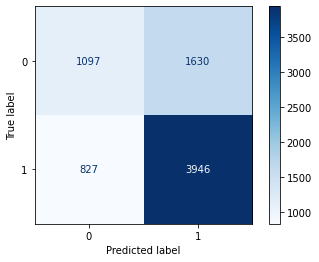

In [252]:
#visualize the confusion matrix
cnf_matrix  = plot_confusion_matrix(base_tree, X_test, y_test, cmap=plt.cm.Blues)

In [253]:
#balance the training classes and see the effect on the model using SMOTE
X_train_smote, y_train_smote = SMOTE().fit_resample(X_train, y_train)

print(y_train_smote.value_counts())


0    11136
1    11136
Name: Target, dtype: int64


In [279]:
#retrain the model with the model with the balanced classes
base_tree_smote = DecisionTreeClassifier()
Basemodel_balanced = model_trainer(base_tree_smote, X_train_smote, y_train_smote,X_test,y_test)
Basemodel_balanced

{'precision': 0.7433208489388264,
 'recall_score': 0.6237167399958098,
 'accuracy_score': 0.6234666666666666,
 'f1_score': 0.6782866256550467}

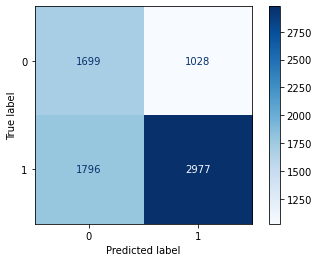

In [256]:
#visualize the confusion matrix
cnf_matrix  = plot_confusion_matrix(base_tree_smote, X_test, y_test, cmap=plt.cm.Blues)

In [257]:
#function to tune the model and find best parameters for the DecisionTreeClassifier using gridSearchCv
def grid_search(model, parms, X_tr, y_tr):
  gs_tree = GridSearchCV(model, parms, cv=3)
  gs_tree.fit(X_tr, y_tr)

  return gs_tree.best_params_


In [258]:
#balanced class best perameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [1, 5, 10, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
  }
grid_search(DecisionTreeClassifier(),param_grid, X_train_smote, y_train_smote)


{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [278]:
dtree_par =  DecisionTreeClassifier(criterion= 'entropy', max_depth = 10, min_samples_split= 10)
DecisionTree = model_trainer(dtree_par, X_train_smote,y_train_smote, X_test,y_test)
DecisionTree

{'precision': 0.7305010893246188,
 'recall_score': 0.7024931908652838,
 'accuracy_score': 0.6457333333333334,
 'f1_score': 0.7162234326604721}

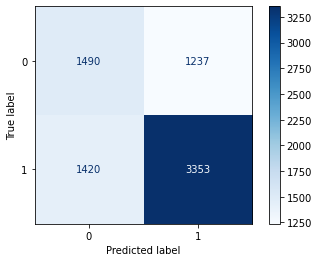

In [261]:
cnf_matrix  = plot_confusion_matrix(dtree_par, X_test, y_test, cmap=plt.cm.Blues)

The model recall score increased meaning more positive patients were identified but there are still many wrongly classified petients too 

In [262]:
#evaluating the two more models and see if they perform better then the DecisionTreeClassifier
# these two are LogisticRegression() and KNeighborsClassifier()

logreg = LogisticRegression()
knn = KNeighborsClassifier()


In [263]:
models = [logreg,knn]
scores=[]
recall=[]


In [264]:
for i in models:
    estimator=Pipeline([
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train_smote,y_train_smote,cv=3,scoring='recall')
    scores.append(model_cv)
    recall.append(model_cv.mean())
    
    
pd.DataFrame({'model':['Logistic Regression','KNN'],'Recall Score':recall}).set_index('model').sort_values(by='Recall Score',ascending=False)

,Recall Score
model,
KNN,0.815733
Logistic Regression,0.589260


The KNeighborsClassifier performs better than the LogistiClassifier with the default parameters

In [265]:
#plot the KNN and virtualize the confussion matrix

kn_base =  KNeighborsClassifier()
model_trainer(kn_base, X_train_smote, y_train_smote,X_test,y_test)


{'precision': 0.703127998464786,
 'recall_score': 0.7676513723025351,
 'accuracy_score': 0.6458666666666667,
 'f1_score': 0.733974358974359}

In [266]:
#tune the the KNN 
knn_gridSearch = KNeighborsClassifier()

parameters = {'n_neighbors':[5,6,7,8,10],
              'leaf_size':[3,4,5,8,10],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]}
grid_search(knn_gridSearch, parameters, X_train_smote, y_train_smote)


{'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': -1, 'n_neighbors': 10}

In [312]:
knn_improved = KNeighborsClassifier(algorithm = 'auto', leaf_size = 4, n_jobs = -1, n_neighbors = 8)
KNeighbors = model_trainer(knn_improved, X_train_smote,y_train_smote, X_test,y_test)
KNeighbors

{'precision': 0.7158572021585721,
 'recall_score': 0.7226063272574901,
 'accuracy_score': 0.6409333333333334,
 'f1_score': 0.7192159316025442}

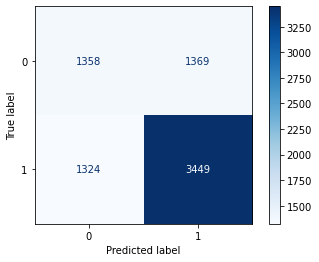

In [313]:
cnf_matrix  = plot_confusion_matrix(knn_improved, X_test, y_test, cmap=plt.cm.Blues)

The KNN Model has improved our recall significantly and this means our model will be able to identify more people with the  virus

In [269]:
#final model the logisticRegressor
base_logrig = LogisticRegression()
model_trainer(base_logrig, X_train_smote, y_train_smote,X_test,y_test)

{'precision': 0.7422434367541766,
 'recall_score': 0.5864236329352609,
 'accuracy_score': 0.6072,
 'f1_score': 0.6551966292134832}

In [270]:
#performing hyper perameter tuning on the model
logR_improved = LogisticRegression()

parameters = { 'C': np.logspace(-4, 4, 50),
                'penalty' : ['l1', 'l2']}
grid_search(logR_improved, parameters, X_train_smote, y_train_smote)


{'C': 0.0004498432668969444, 'penalty': 'l2'}

In [276]:
logR = LogisticRegression(C = 0.0004498432668969444, penalty ='l2')
LogisticReg = model_trainer(logR, X_train_smote, y_train_smote,X_test,y_test)
LogisticReg

{'precision': 0.7422434367541766,
 'recall_score': 0.5864236329352609,
 'accuracy_score': 0.6072,
 'f1_score': 0.6551966292134832}

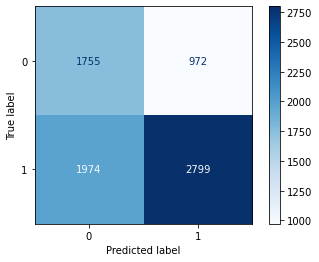

In [273]:
cnf_matrix  = plot_confusion_matrix(logR, X_test, y_test, cmap=plt.cm.Blues)

In [306]:
scores = [LogisticReg, Basemodel_balanced, DecisionTree,KNeighbors, ]
column_name = ['LogisticReg','Basemodel', 'DecisionTree','KNeighbors' ]

Create a dataframe of all the scores from the four models

In [307]:

df = pd.DataFrame(columns = column_name)
df.LogisticReg =LogisticReg.values()
df.Basemodel = Basemodel_balanced.values()
df.DecisionTree = DecisionTree.values()
df.KNeighbors = KNeighbors.values()

df.index = ['precision', 'recall_score','accuracy_score','f1_score']
df

,LogisticReg,Basemodel,DecisionTree,KNeighbors
precision,0.742243,0.743321,0.730501,0.715857
recall_score,0.586424,0.623717,0.702493,0.722606
accuracy_score,0.607200,0.623467,0.645733,0.640933
f1_score,0.655197,0.678287,0.716223,0.719216


The KNeighborsClassifier had the best sores and since this model will be used in detecting MonkeyPox viruses a high recall is needed then precision since this will prevent the number of false positives making more positive cases to be identified and treated in advance

In [318]:
#develop a final pipline that will be used to train the model on the whole dataset and make the model ready for deployment
#Balance the whole dataset using smote 
X_smote, y_smote = SMOTE().fit_resample(X, y)
y_smote.value_counts()



0    15909
1    15909
Name: Target, dtype: int64

In [324]:
pipeline = Pipeline([('KNN', KNeighborsClassifier(algorithm = 'auto', leaf_size = 4, n_jobs = -1, n_neighbors = 8))])
pipeline.fit(X_smote,y_smote)

Pipeline(steps=[('KNN',
                 KNeighborsClassifier(leaf_size=4, n_jobs=-1, n_neighbors=8))])

In [329]:
#model performance after training on the whole data
model_trainer(pipeline, X_smote, y_smote,X_test,y_test)


{'precision': 0.7318840579710145,
 'recall_score': 0.7617850408548082,
 'accuracy_score': 0.6708,
 'f1_score': 0.7465352633199877}

In [331]:
#save our model into a pickle
with open('model.pkl', 'wb') as f:
  joblib.dump(pipeline, f)